### Import Dependencies and load the dataset

In [70]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv('transactions.csv')
dataset_name = 'MCO2-20240101-20240224'
df = pd.read_csv(f'data/{dataset_name}.csv')

### Create a direct graph and create nodes and edges

In [71]:

# Create an directed graph
G = nx.DiGraph()

for _, transaction in df.iterrows():
    # try:
    G.add_node(transaction['from'])
    G.add_node(transaction['to'])

    value = float(transaction['Quantity'].replace(',', ''))
    # value = int(transaction['value'], 16)
    G.add_edge(transaction['from'], transaction['to'], weight=value)

### Betweenness Centrality
Betweenness centrality is a measure of centrality in a graph based on shortest paths.  
It quantifies the number of times a node acts as a bridge along the shortest path between two nodes.  
Can also measure how much influence a node has over the spread of information through a network(under the assumption that item transfer follows the shortest paths.)

In [72]:
betweenness_scores = nx.betweenness_centrality(G)

# Print the top 10 nodes with the highest betweenness centrality scores
top_nodes = sorted(betweenness_scores, key=betweenness_scores.get, reverse=True)[:10]
for node in top_nodes:
    print(f"Node: {node}, Betweenness Centrality: {betweenness_scores[node]}") 

Node: 0x8fd587b5ea5abd65ad3439d9e58c63222866baa9, Betweenness Centrality: 0.10157163597836626
Node: 0x0d0707963952f2fba59dd06f2b425ace40b492fe, Betweenness Centrality: 0.05436135837012496
Node: 0x4a5cf9ecc6fdd4750df92a33ced79d477d9298c8, Betweenness Centrality: 0.03042729131823622
Node: 0x40ec5b33f54e0e8a33a975908c5ba1c14e5bbbdf, Betweenness Centrality: 0.021610085525637878
Node: 0x61ed4b62e03798305818607c7160b2abff15cfed, Betweenness Centrality: 0.012914054263996005
Node: 0x65a8f07bd9a8598e1b5b6c0a88f4779dbc077675, Betweenness Centrality: 0.012900183099373023
Node: 0xb8ba36e591facee901ffd3d5d82df491551ad7ef, Betweenness Centrality: 0.010209177162514564
Node: 0x74de5d4fcbf63e00296fd95d33236b9794016631, Betweenness Centrality: 0.009613641828034548
Node: 0x13307b8854a95946b54a904100afd0767a7a577b, Betweenness Centrality: 0.006936374949469332
Node: 0xd0be1fded5d964619b92b3672c08c43305529be0, Betweenness Centrality: 0.006936374949469332


### Community Detection

In [73]:
communities = nx.community.louvain_communities(G)
for i, community in enumerate(communities):
    print(f"Community {i}: {community}")

Community 0: {'0xfdb80ebfe0d81fd6b1bb8f049fa557a2c6a3c20e', '0x337f16e8ef28fdcb36b1f87cc27ff6ea26414366', '0x5120b2638c9534039a8751104ad40e4efa1c4116', '0xed4a0b7899cb081a370dc1fa11db9cdeb903e3ca', '0x48f92dad9a6f7cb132b5f123ac820356dd6e3e0c', '0xb8ba36e591facee901ffd3d5d82df491551ad7ef', '0x27957b154038868aa3d90f49d822d524aa77d57d', '0x8ce13c17b9c9cae9193538dc2a64ca7be07e2c00', '0x6213e74c898ce3521aab7f1dc0da04fe5a3f0d1f', '0x8518eb6b382016b300bcab3c2d223546aee3093d', '0xadf5739a1891b51838227e347a881da96ef96c33', '0xaeb6aa86232e7892e973899f885584ce530fafd5', '0x0395063f30226655ae54891b4f5dbe83572872bb', '0x0243ec6ddf1f16b606302cc84f6775dc2a1e186d', '0x55a0ea8f8d78c788acfb40a34ac4d8bd35bccf37', '0x5fff56c053d5428af6c34341535e0f6f9d5ebb4e'}
Community 1: {'0x760e2a53bcc0c57011adcb826daf0e2669025cb6', '0x3d5bfa168717a3c92f25d0d31b41cb821d4e8343', '0x5ca9ac94c80db548c7185ac22dccc72f128d40aa', '0xe8e78f74bf7a35fdb77a2961663ce1c197f2ed15', '0xb679b54b89078c93154c597004358d8322fbd09f', '0xa42

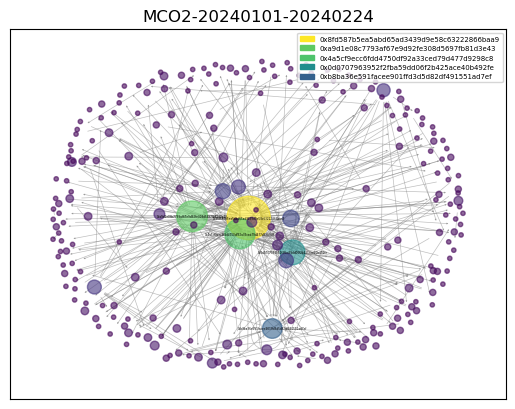

In [74]:
import matplotlib.patches as mpatches

# count node degrees
degrees_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degrees_dict, 'degree')

# top 5 degrees
top_degrees = sorted(degrees_dict.items(), key=lambda x: x[1], reverse=True)[:5]
top_nodes = [node for node, _ in top_degrees]

# Create a color map based on degree
colors = [degrees_dict[n] for n in G.nodes]
cmap = plt.cm.viridis
color_map = [cmap((degree/max(colors))*1.5) for degree in colors]

# Compute the layout using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G, k=5, seed=42)

nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=[v * 10 for v in degrees_dict.values()], alpha=0.6)
nx.draw_networkx_edges(G, pos, edge_color='grey', arrowsize=2, width=0.5, alpha=0.5)

labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=2, font_color='black')

# list nodes with top 5 degrees
legend_patches = [mpatches.Patch(color=cmap(degree_dict[node]/max(colors)*1.5), label=node) for node, _ in top_degrees]
plt.legend(handles=legend_patches, fontsize=5, loc='upper right')

plt.title(dataset_name)
plt.savefig(f'results/{dataset_name}.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

# from pyvis.network import Network
# net = Network('600px', '800px')


# # Add nodes and edges to the PyVis network
# for node, degree in G.degree():
#     # color = 'blue' if degree > 10 else 'red'  # Change color based on degree
#     size = degree  # Change size based on degree
#     # net.add_node(node, color=color, size=size)
#     net.add_node(node, color=['lightgreen', 'yellow'], size=size)

# for edge in G.edges(data=True):
#     # color = 'black' if edge[2]['weight'] > 10 else 'grey'  # Change color based on weight
#     color = 'grey'
#     width = edge[2]['weight']  # Change width based on weight
#     net.add_edge(edge[0], edge[1], color='red', width=width)

# # populating the nodes from networkx to pyvis
# # net.from_nx(G)
# net.show_buttons()
# net.show('ETH-visualization-example.html', notebook=False)